In [1]:
import numpy as np
import random, math, pylab
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib.pyplot as plt

# Question 1: 
In the first part, you estimate $\pi$ (the mathematical constant) by using a **Direct Sampling Algorithm** and determine the **Statistical Error** of your numerical calculation.

### Pi value Estimation

In [2]:
# I'm going to randomly sample points in the square of side 1 unit with uniform random sampling.

direct_samples = lambda x: np.random.random((int(N), 2))

N = 1e6
points_square = direct_samples(N)

In [3]:
# Check points in circe of diameter 1 unit.

circle_idx = lambda points_square: ((points_square - 0.5)**2).sum(axis=-1) < (0.5)**2

idx = circle_idx(points_square)
points_circle = points_square[idx]

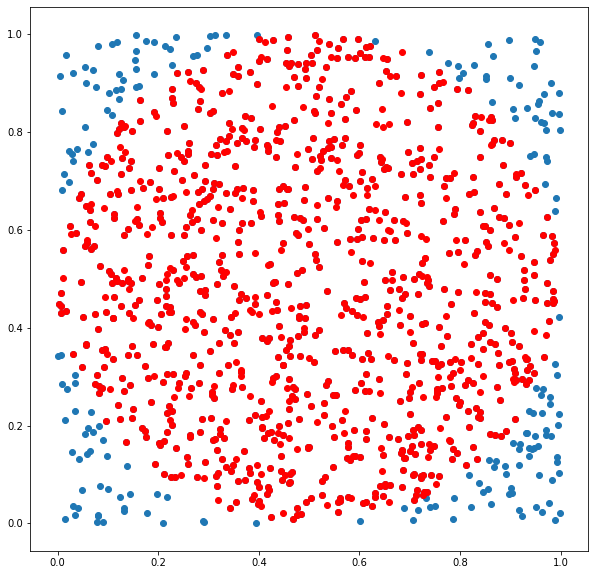

In [4]:
plt.rcParams['figure.figsize'] = 10, 10

n = 1000
plt.scatter(points_square[:n, 0], points_square[:n, 1])
plt.scatter(points_circle[:n, 0], points_circle[:n, 1], color='r')
plt.show()

In [5]:
pi_value = 4 * len(points_circle) / len(points_square)

print("Estimated Pi value is: ", pi_value)

Estimated Pi value is:  3.140856


In [6]:
def direct_pi(N):
    N = int(N)
    n_hits = 0
    for i in range(N):
        x, y = random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    return n_hits

n_runs = 500
n_trials_list = []
sigmasqs = []
for poweroftwo in range(4, 13):
    n_trials = 2 ** poweroftwo
    sigmasq = 0.0
    for run in range(n_runs):
        pi_est = 4.0 * direct_pi(n_trials) / float(n_trials)
        sigmasq += (pi_est - math.pi) ** 2
    sigmasqs.append(math.sqrt(sigmasq/(n_runs)))
    n_trials_list.append(n_trials)

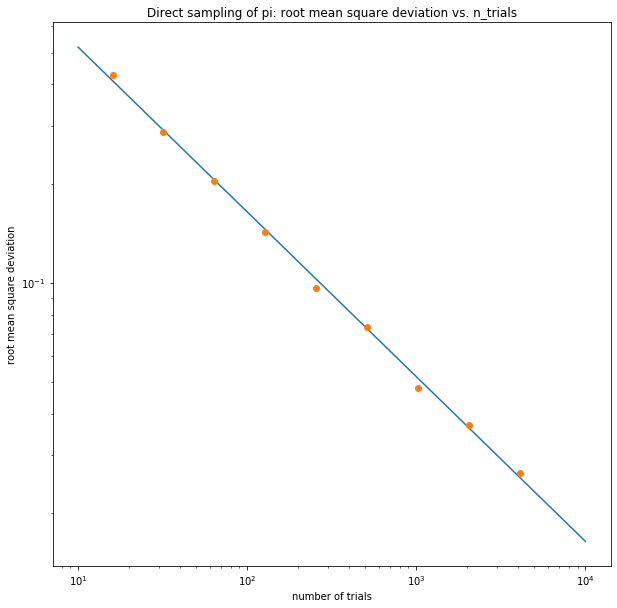

In [7]:
pylab.plot([10.0, 10000.0], [1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)])

pylab.plot(n_trials_list, sigmasqs, 'o')
pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.title('Direct sampling of pi: root mean square deviation vs. n_trials')
pylab.savefig('direct_sampling_rms_deviation.png')
pylab.show()

### Question A:

Explain in a few words why one can say that the "error" of the direct_pi calculation goes like 1.642 / sqrt(N_trials) (maybe explain what that means at n_trials = 100). Does the "error" of the direct-sampling algorithm go to zero as N_trials goes to infinity?

### Solution of A

The error term is directly proportional to the squared sum of residuals and inversely proportional to the No of Trails.

At N_trials equals to 100, the error will be 0.1642.
It means that 68.2% of values of the pi that we estimated over N=500 run lie in the range (pi_estimated + 0.1642) and (pi_estimated - 0.1642) \[Note: 68.2% data lies within the range of one standard deviation.\]

As the N_trials tend to infinity, the error will approach zero.

### Error Estimation

In [8]:
def monte_carlo_pi(n_run = 1, n_trials = 1e3):
    '''
    N: No of points to be used for sampling.
    '''
    n_trials = int(n_trials)
    pi_vals = []
    for i in range(n_run):
        points_square = np.random.random((n_trials, 2))
        points_circle = points_square[((points_square - 0.5)**2).sum(axis=-1) < (0.5)**2]
        pi_vals.append(4 * len(points_circle) / len(points_square))
    
    return np.array(pi_vals)

In [9]:
data = [monte_carlo_pi(n_run = 500, n_trials = int(2**x)) for x in range(1, 17)]

In [10]:
rms_error = lambda x: np.sqrt(((x - np.pi)**2).mean())

In [11]:
x = list(range(1, 17))
y = [rms_error(x) for x in data]

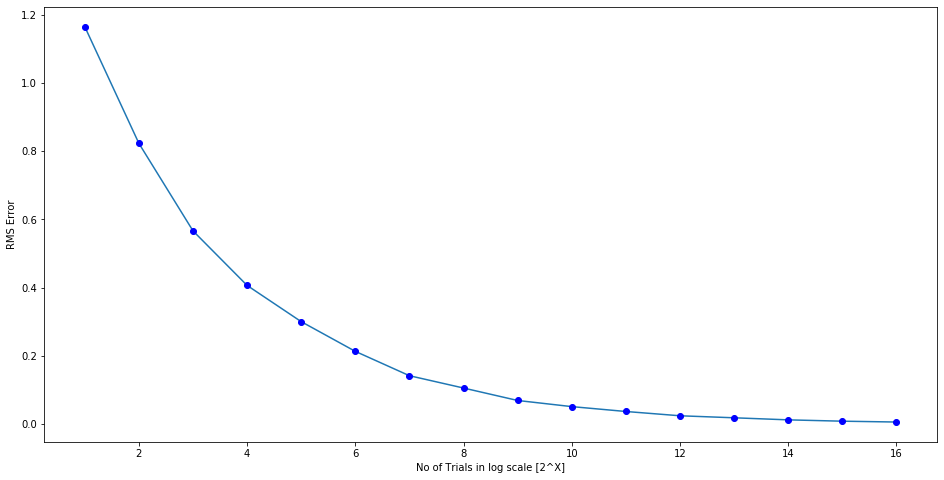

In [12]:
plt.rcParams['figure.figsize'] = 16, 8

plt.plot(x, y)
plt.plot(x, y, 'o', color='blue')
plt.xlabel("No of Trials in log scale [2^X]")
plt.ylabel("RMS Error")
plt.show()

# Question 2:

In the second part, you again estimate pi, but this time for a **Markov-chain algorithm**. The precision of the result depends on the step size delta, which itself changes the rejection rate. You will see that performance is best when delta is chosen such that about half of the proposed moves are accepted. This is called the "1/2 rule". It is a rule of thumb, not a mathematical law.

### Pi value Estimation

In [13]:
# I'm going to randomly sample points in the square of side 1 unit with uniform random sampling.

def hastings_samples(N, delta=1.0):
    N = int(N)
    points_square = []
    seed_point = np.random.uniform(size=(1, 2))

    for x in range(N):
        update = np.random.uniform(low=-delta, high=delta, size=(1, 2))
        new_point = seed_point + update
        if np.max(new_point) <= 1.0 and np.min(new_point) >= 0.0:
            points_square.append(new_point)
            seed_point = new_point

    return np.squeeze(np.array(points_square))

N = 1e5
points_square = hastings_samples(N)

In [14]:
# Check points in circe of diameter 1 unit.

idx = circle_idx(points_square)
points_circle = points_square[idx]

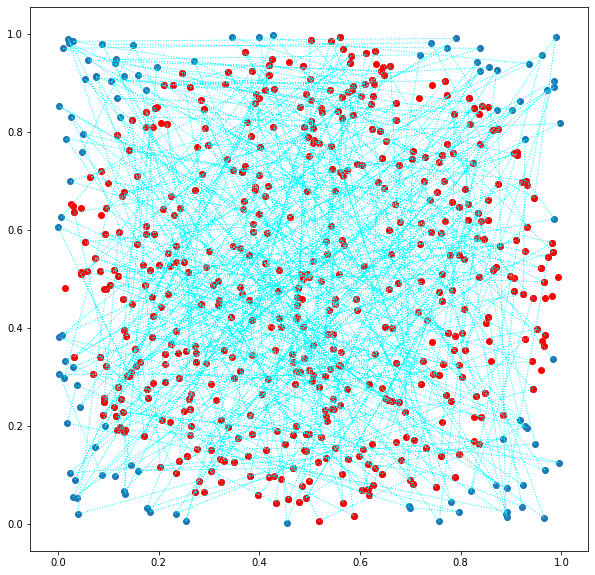

In [15]:
plt.rcParams['figure.figsize'] = 10, 10

n = 500

codes = [Path.MOVETO] + [Path.LINETO]*(n-1)
path = Path(points_square[:n, :], codes, closed=False)

fig, ax = plt.subplots()
patch = patches.PathPatch(path, facecolor="none", edgecolor="cyan", ls=":")
ax.add_patch(patch)

ax.scatter(points_square[:n, 0], points_square[:n, 1])
ax.scatter(points_circle[:n, 0], points_circle[:n, 1], color='r')

plt.show()

In [16]:
pi_value = 4 * len(points_circle) / len(points_square)

print("Estimated Pi value is: ", pi_value)

Estimated Pi value is:  3.135502438244464


### Error Estimation

In [17]:
def markov_pi(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
    return n_hits

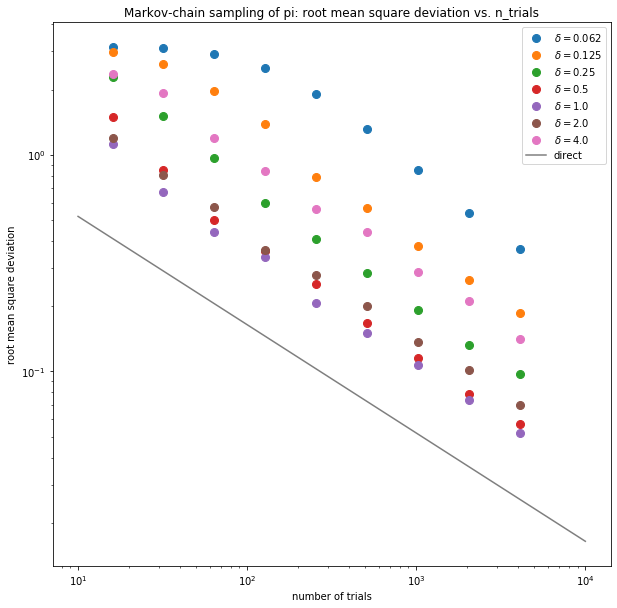

In [18]:
n_runs = 500

for delta in [0.062, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0]:
    n_trials_list = []
    sigmas = []
    for poweroftwo in range(4, 13):
        n_trials = 2 ** poweroftwo
        sigma = 0.0
        for run in range(n_runs):
            n_hits = markov_pi(n_trials, delta)
            pi_est = 4.0 * n_hits / float(n_trials)
            sigma += (pi_est - math.pi) ** 2        
        sigmas.append(math.sqrt(sigma/(n_runs)))
        n_trials_list.append(n_trials)    
    pylab.plot(n_trials_list, sigmas, 'o', ms = 8, label = '$\delta = $' + str(delta))

pylab.xscale('log')
pylab.yscale('log')
pylab.xlabel('number of trials')
pylab.ylabel('root mean square deviation')
pylab.plot([10,10000],[1.642 / math.sqrt(10.0), 1.642 / math.sqrt(10000.0)], label = 'direct')
pylab.title('Markov-chain sampling of pi: root mean square deviation vs. n_trials')
pylab.legend(loc='upper right')
pylab.savefig('markov_sampling_rms_deviation.png')
pylab.show()

In [19]:
def acceptance_rate(N, delta):
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
            n_hits += 1

    return n_hits/N

In [20]:
acc_rts = {float(2**x): acceptance_rate(2**14, 2**x) for x in range(-4, 3)}

print("Delta  || Acceptance Rate")
for x in acc_rts:
    print("{:.04f} || {:.13f} ".format(x, acc_rts[x]))

Delta  || Acceptance Rate
0.0625 || 0.9611816406250 
0.1250 || 0.9375000000000 
0.2500 || 0.8732299804688 
0.5000 || 0.7656860351562 
1.0000 || 0.5628051757812 
2.0000 || 0.2504882812500 
4.0000 || 0.0602416992188 


### Question A: 
Which of the values of delta gives the most precise results?

### Question B:
Explain why VERY small values of delta and VERY large values of delta yield a less precise result than intermediate values.

### Question C:
Explain in a few words why the error is larger than for the direct sampling algorithm, even for the optimal value of delta.

### Solution of A
The larger value gives a precise result. In this case, delta = 1.0 gives better results relative to others.

### Solution of B
In the case of very small delta values, most of the size of the jumps is very small hence for most of the timing chain doesn't explore the whole area effectively. In the case of very large delta values, most of the values are rejected hence the chain stay at a point in space for a longer time and again fails to explore the whole area effectively.

### Solution of C
Markov Chain Sampling is dependent on the last sampled point which changes the explorable area with every jump. The intersection of the new explorable space and the real space which has to be explored is smaller due to which many proposed samples are rejected and we're not able to get 100% out of the sampling relative to direct sampling. Hence the expected error is larger even for the most optimal value.

# Question 3

In **section A**, we saw that the error of pi_{direct} behaves as $$ \frac{1.642}{\sqrt{N_{trials}}}$$ while, in **Section B**, we noticed that the error of pi_{markov} follows the law: $$ \frac{constant}{\sqrt{N_{trials}}}$$ for large N_trials. The constant is larger (sometimes much larger) than 1.642 and it depends on the stepsize delta.In this Section we understand what the value 1.642 means and how we can compute it with and without knowing the mathematical value of pi. We then find a good way to compute the error in markov_pi.py from a single run and without knowing the mathematical value of pi . This is the **bunching method**.

### Question A:
Computes the "variance" of the relevant observable (Obs = 0.0 if the pebble is outside the circle, Obs = 4.0 if the pebble is inside the circle

### Solution of A

In [21]:
np.random.seed(15)

In [22]:
# Samples through uniform distribution.
samples = direct_samples(1e6)

# Check the points which are inside a circle.
idx = circle_idx(samples)

# Std. Dev according to given condition.
np.sqrt(np.var((~idx)*4 - np.pi))

1.6420948333150558

### Question B

The program of Section A is used the exact value of p_i in order to compute the error. In a real calculation, we don't know this result beforehand. One therefore replaces pi through its best estimate, the mean value <Obs>. Using

$$<{(Obs−pi)}^2> ∼ <{Obs}^2> − {\pi}^2 ∼ <{Obs}^2> − {<Obs>}^2,$$

we see that we have to estimate $<{Obs}^2> − {<Obs>}^2$.

Check that the square root of $<{Obs}^2> − {<Obs>}^2$

In [23]:
np.sqrt(np.mean(((~idx)*4)**2) - (np.mean((~idx)*4))**2)

1.6420948333150556

### Question C

The previous Section C2 gives a general solution for the direct-sampling, and we now have to do the same for Markov chains. As we saw in Section B1, the error is again as const / sqrt(N_{trials}), but the constant does not equal 1.664, it may be much larger. Nevertheless, as the distribution of pebbles is the same in the direct-sampling and in Markov-chain sampling, the variance and the standard deviation are the same. The quantity sigma / sqrt({N_trials}) strongly **UNDERESTIMATES** the error, as we saw in Section B1. This is **due to the correlation between subsequent samples**.To estimate the error of a Markov-chain simulation that has obtained observables $Obs_{0}, Obs_{1},..., Obs_{n\_trials -1}$, we should rather BUNCH the data, as follows:

$$\frac{(Obs_{0} + Obs_{1})}{2}, \frac{(Obs_{2} + Obs_{3})}{2}, ..., \frac{(Obs_{n\_trials - 2} + Obs_{n\_trials - 1})}{2}$$

This gives a new chain of data, with new observables (mean value of two subsequent old ones), a new number of trials that is half the old one, an unchanged mean value, but a new value of the variance, and a new estimate of the error, using the naive formula for direct sampling.This famous bunching procedure can then be iterated, making pairs, then pairs of pairs, then pairs of pairs of pairs. This very successful algorithm is implemented for a long sequence of data produced by markov_pi.py

In [24]:
# Samples through uniform distribution.
samples = hastings_samples(1e4)

#Add consecutive samples
samples = np.add.reduceat(samples, range(0, samples.shape[0], 2))/2

# Check the points which are inside a circle.
idx = circle_idx(samples)

# Std. Dev according to wehn pi is known.
np.sqrt(np.var((~idx)*4 - np.pi))

0.6172665891137183

In [25]:
# Std. Dev according to wehn pi is unknown
np.sqrt(np.mean(((~idx)*4)**2) - (np.mean((~idx)*4))**2)

0.6172665891137185

### Question D
Explain in a few words why the apparent error initially increases with the iterations, then saturates (more or less) to a plateau.

### Solution of D

If we observe the distribution of data, we observe that the variance of the data first increases and then it start decreasing and after a point it becomes stationary. The error we observe is directly proportional to sigma ie. square root of variance. Hence the trend in the error can be understood from the variance.   

In [26]:
def direct_pi_all_data(N, delta):
    x, y = 0.5, 0.5
    data = []
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x ** 2 + y ** 2 < 1.0:
            data.append(4.0)
        else:
            data.append(0.0)
    return data

In [27]:
def markov_pi_all_data(N, delta):
    x, y = 1.0, 1.0
    data = []
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x ** 2 + y ** 2 < 1.0:
            data.append(4.0)
        else:
            data.append(0.0)
    return data

3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi
3.140338897705078 mean value, estimate of pi


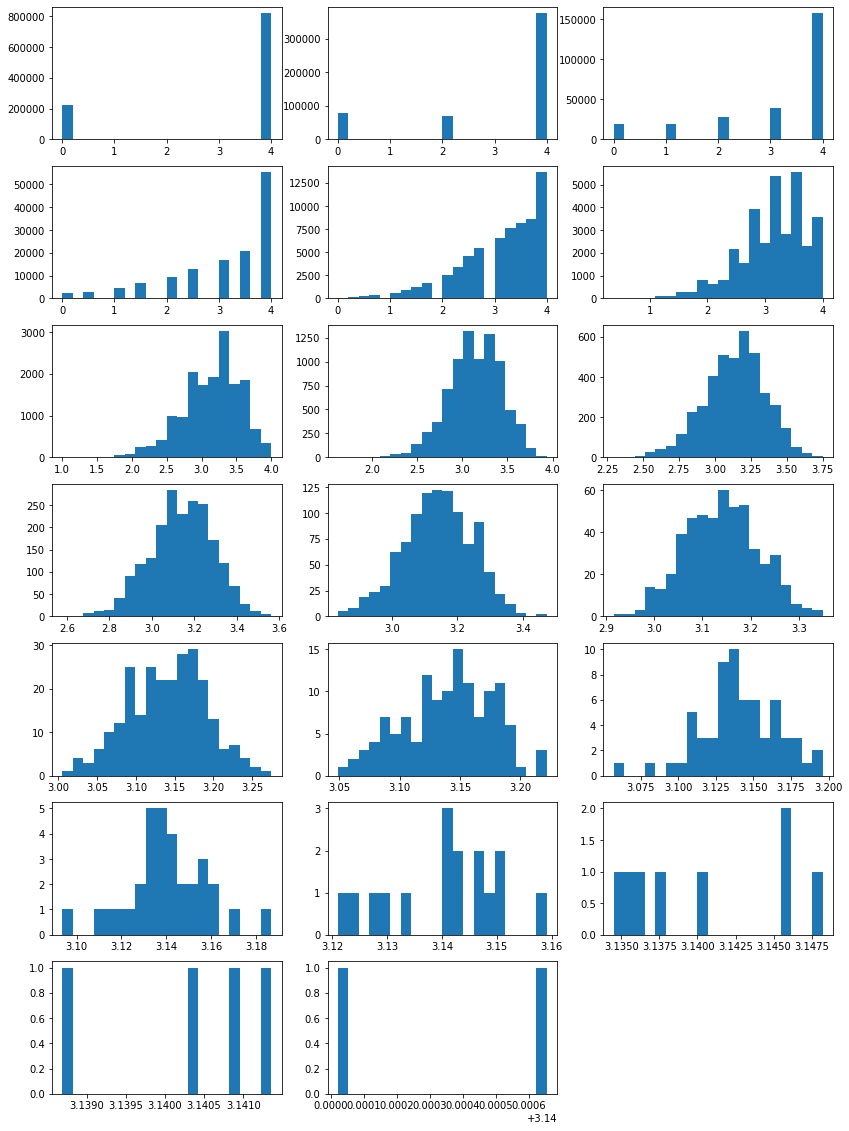

In [28]:
plt.rcParams["figure.figsize"] = 14, 20

poweroftwo = 20
n_trials = 2 ** poweroftwo
delta = 1.0
data = markov_pi_all_data(n_trials, delta)
errors  = []
residual = []
bunches = []
for i in range(poweroftwo):
    new_data = []
    mean = 0.0
    mean_sq = 0.0
    N = len(data)
    plt.subplot(7, 3, i+1)
    plt.hist(data, bins=20)
    while data != []:
        x = data.pop()
        y = data.pop()
        mean += x + y
        mean_sq += x ** 2 + y ** 2
        new_data.append((x + y) / 2.0 )
    errors.append(math.sqrt(mean_sq / N - (mean / N) ** 2) / math.sqrt(N))
    residual.append((mean / float(N)) - np.pi)
    bunches.append(i)
    data = new_data[:]
    print (mean / float(N), 'mean value, estimate of pi')
plt.show()

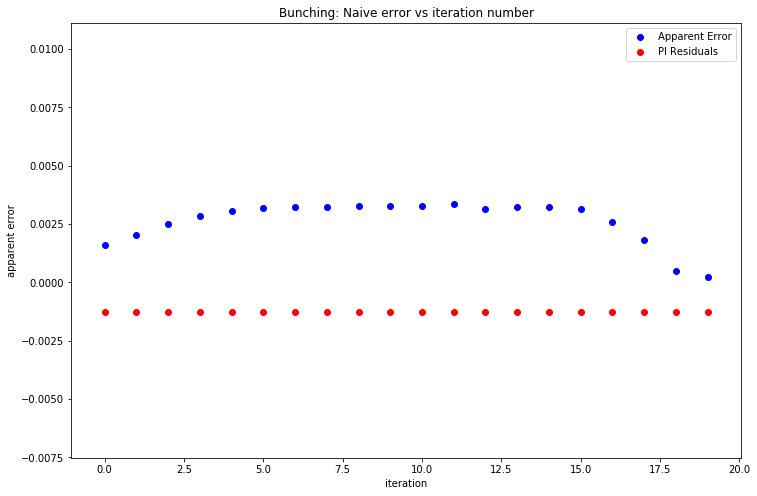

In [29]:
plt.rcParams["figure.figsize"] = 12, 8
plt.scatter(bunches, errors, color="blue")
plt.scatter(bunches, residual, color="red")
plt.legend(["Apparent Error", "PI Residuals"])
plt.xlabel('iteration')
plt.ylabel('apparent error')
plt.title('Bunching: Naive error vs iteration number')
plt.savefig('apparent_error_bunching.png')
plt.show()

### Question E
The program outputs the mean value (which does not change with iteration), the Monte Carlo evaluation pi^est of pi. Compare the absolute value of (pi^est - pi) with the plateau error. Are they similar?

### Solution of E
Yes, they are quite similar. The difference between plateau error and mean residuals of (estimated pi with real pi) lies in the order of ${10}^{-2}$.